In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Вариант 1

# Import

In [37]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных

In [38]:
df = pd.read_csv('/content/drive/MyDrive/lab4_6.csv')
df.head(5)

,X1,X2,Class
0,0.689551,0.900750,MO
1,0.283680,0.713806,MO
2,0.122529,-0.646096,MO
3,0.603928,-0.485924,MO
4,-0.298863,0.390297,ON


<Axes: xlabel='X1', ylabel='X2'>

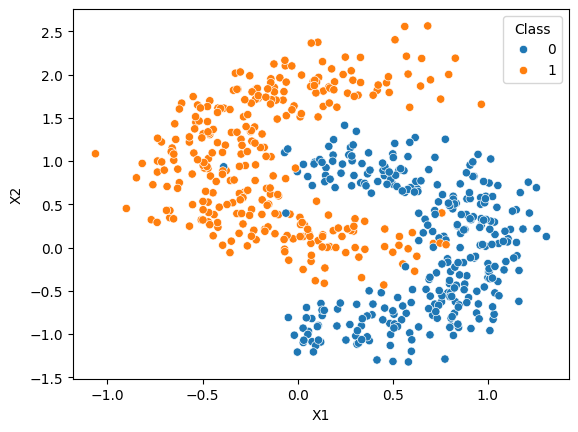

In [100]:
sns.scatterplot(data = df, x = 'X1', y = 'X2', hue = 'Class', palette = 'tab10')

In [40]:
# Вычисление доли каждого класса
class_counts = df['Class'].value_counts()
total_samples = df.shape[0]

class_0_ratio = class_counts[0] / total_samples
class_1_ratio = class_counts[1] / total_samples

print("Доля класса MO:", class_0_ratio)
print("Доля класса ON:", class_1_ratio)

Доля класса MO: 0.5008319467554077
Доля класса ON: 0.49916805324459235


In [41]:
from sklearn.preprocessing import LabelEncoder

# Замена текстовых данных на числовые
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

# Удаление строк с отсутствующими значениями (null значениями)
df.dropna(inplace=True)

# Удаление дубликатов
df.drop_duplicates(inplace=True)

df

,X1,X2,Class
0,0.689551,0.900750,0
1,0.283680,0.713806,0
2,0.122529,-0.646096,0
3,0.603928,-0.485924,0
4,-0.298863,0.390297,1
...,...,...,...
596,1.025183,-0.684972,0
597,0.019383,1.547216,1
598,0.295495,0.245569,1
599,0.978260,0.316883,0


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[["X1", "X2"]].to_numpy()
y = df["Class"].to_numpy()

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, shuffle = False)

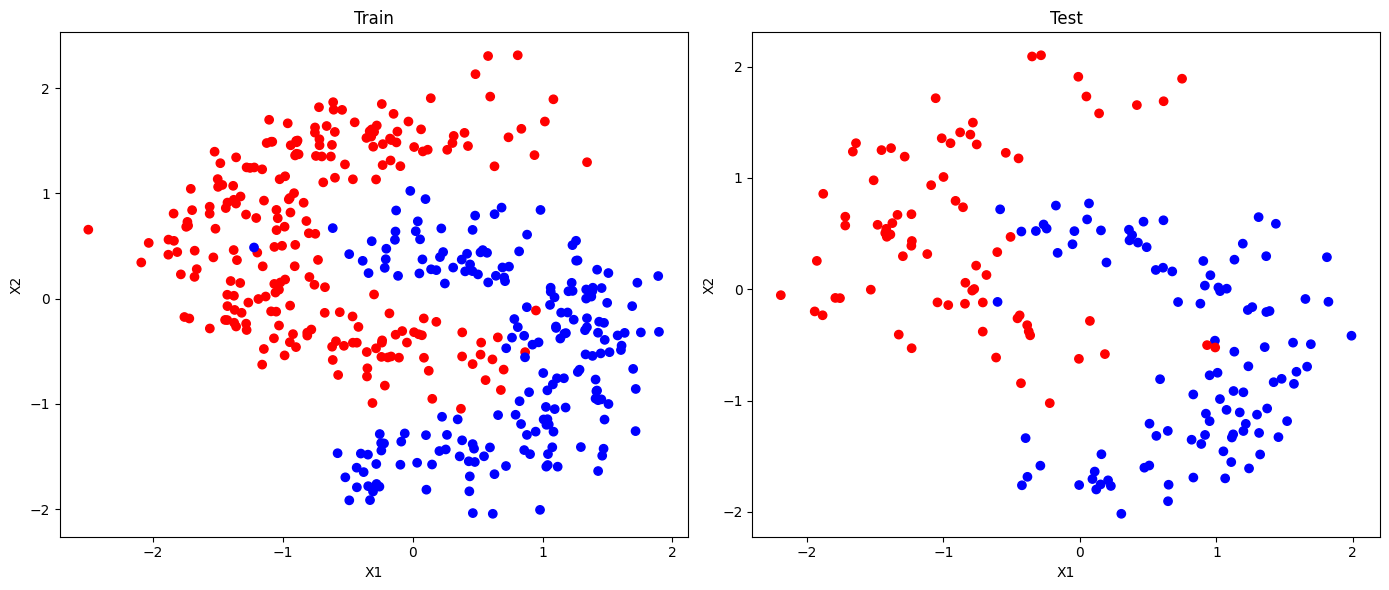

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

colors_train = ["red"] * len(y_train)
for i in range(len(y_train)):
  if y_train[i] == 0:
    colors_train[i] = 'blue'

colors_test = ["red"] * len(y_test)
for i in range(len(y_test)):
  if y_test[i] == 0:
    colors_test[i] = 'blue'

axes[0].scatter(X_train[:, 0], X_train[:, 1], c=colors_train)
axes[0].set_title(f'Train')
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')

axes[1].scatter(X_test[:, 0], X_test[:, 1], c=colors_test)
axes[1].set_title(f'Test')
axes[1].set_xlabel('X1')
axes[1].set_ylabel('X2')

plt.tight_layout()
plt.show()

# kNN

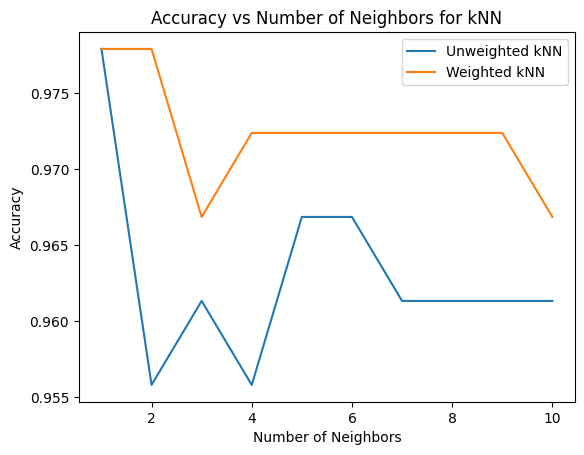

In [44]:
from sklearn.neighbors import KNeighborsClassifier

# Список для хранения точности для не взвешенного kNN
accuracy_unweighted = []

# Список для хранения точности для взвешенного kNN
accuracy_weighted = []

# Диапазон количества соседей для тестирования
neighbors_range = range(1, 11)

for k in neighbors_range:
    # Обучение модели kNN без весов
    knn_unweighted = KNeighborsClassifier(n_neighbors=k)
    knn_unweighted.fit(X_train, y_train)
    # Вычисление точности и добавление в список
    accuracy_unweighted.append(knn_unweighted.score(X_test, y_test))

    # Обучение модели kNN с весами
    knn_weighted = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_weighted.fit(X_train, y_train)
    # Вычисление точности и добавление в список
    accuracy_weighted.append(knn_weighted.score(X_test, y_test))

# Построение графика
plt.plot(neighbors_range, accuracy_unweighted, label='Unweighted kNN')
plt.plot(neighbors_range, accuracy_weighted, label='Weighted kNN')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Neighbors for kNN')
plt.legend()
plt.show()

In [45]:
k = 1
knn_unweighted = KNeighborsClassifier(n_neighbors=k)
knn_unweighted.fit(X_train, y_train)

knn_weighted = KNeighborsClassifier(n_neighbors=k, weights='distance')
knn_weighted.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1, weights='distance')

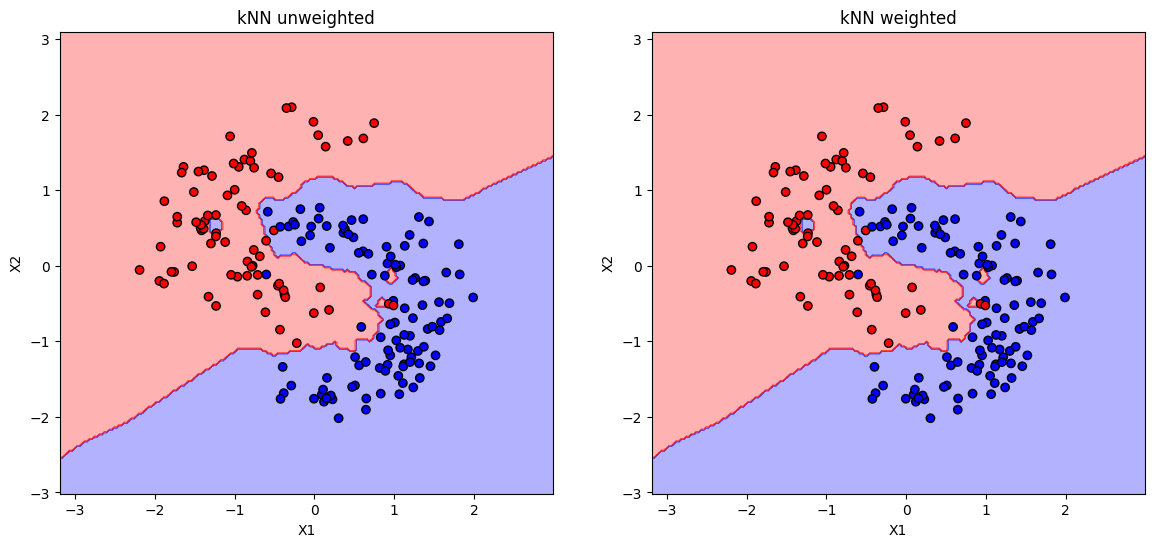

In [46]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(["blue", "red"])
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
display_unweighted = DecisionBoundaryDisplay.from_estimator(
    knn_unweighted, X_test, response_method='predict',
    xlabel='X1', ylabel='X2', ax=axes[0],
    grid_resolution=200, alpha = 0.3, cmap = cmap_light)
axes[0].set_title(f'kNN unweighted')
display_unweighted.ax_.scatter(X_test[:,0], X_test[:,1], c=colors_test, edgecolors = 'black')
display_weighted = DecisionBoundaryDisplay.from_estimator(
    knn_weighted, X_test, response_method='predict',
    xlabel='X1', ylabel='X2', ax=axes[1],
    grid_resolution=200, alpha = 0.3,  cmap = cmap_light)
display_weighted.ax_.scatter(X_test[:,0], X_test[:,1], c=colors_test, edgecolors = 'black')
axes[1].set_title(f'kNN weighted')
plt.show()

In [47]:
from sklearn.metrics import confusion_matrix

y_pred_unweighted = knn_unweighted.predict(X_test)
y_pred_weighted = knn_weighted.predict(X_test)

# Рассчет матрицы ошибок для взвешенной и невзвешенной kNN
confusion_unweighted = confusion_matrix(y_test, y_pred_unweighted)
confusion_weighted = confusion_matrix(y_test, y_pred_weighted)

# Преобразование матрицы ошибок в DataFrame pandas
confusion_df_unweighted = pd.DataFrame(confusion_unweighted, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
confusion_df_weighted = pd.DataFrame(confusion_weighted, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Вывод таблицы ошибок
print("Confusion Matrix for Unweighted kNN:")
print(confusion_df_unweighted)

print("\nConfusion Matrix for Weighted kNN:")
print(confusion_df_weighted)

Confusion Matrix for Unweighted kNN:
          Predicted 0  Predicted 1
Actual 0          103            2
Actual 1            2           74

Confusion Matrix for Weighted kNN:
          Predicted 0  Predicted 1
Actual 0          103            2
Actual 1            2           74


In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Рассчет Precision, Recall и F1-score для взвешенной и невзвешенной kNN
precision_unweighted = precision_score(y_test, y_pred_unweighted)
recall_unweighted = recall_score(y_test, y_pred_unweighted)
f1_unweighted = f1_score(y_test, y_pred_unweighted)

precision_weighted = precision_score(y_test, y_pred_weighted)
recall_weighted = recall_score(y_test, y_pred_weighted)
f1_weighted = f1_score(y_test, y_pred_weighted)

# Вывод результатов
print("Precision, Recall и F1-score для Unweighted kNN:")
print("Precision:", precision_unweighted)
print("Recall:", recall_unweighted)
print("F1-score:", f1_unweighted)

print("\nPrecision, Recall и F1-score для Weighted kNN:")
print("Precision:", precision_weighted)
print("Recall:", recall_weighted)
print("F1-score:", f1_weighted)

Precision, Recall и F1-score для Unweighted kNN:
Precision: 0.9736842105263158
Recall: 0.9736842105263158
F1-score: 0.9736842105263158

Precision, Recall и F1-score для Weighted kNN:
Precision: 0.9736842105263158
Recall: 0.9736842105263158
F1-score: 0.9736842105263158


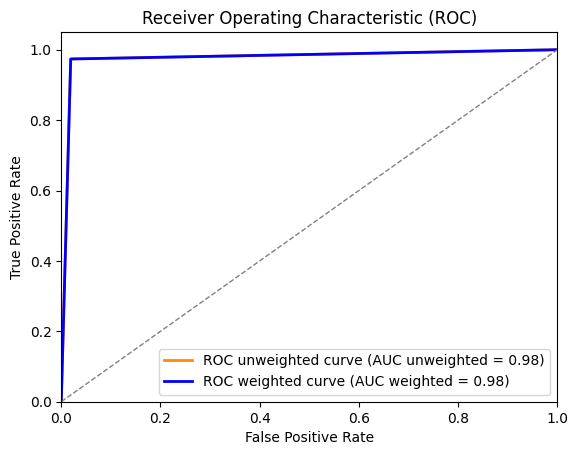

In [49]:
from sklearn.metrics import roc_curve, auc

# Получение вероятности принадлежности к классу 1 для взвешенной и невзвешенной kNN
y_prob_unweighted = knn_unweighted.predict_proba(X_test)[:, 1]
y_prob_weighted = knn_weighted.predict_proba(X_test)[:, 1]

# Рассчет ROC-кривой и значения AUC для взвешенной и невзвешенной kNN
fpr_unweighted, tpr_unweighted, _ = roc_curve(y_test, y_prob_unweighted)
auc_unweighted = auc(fpr_unweighted, tpr_unweighted)

fpr_weighted, tpr_weighted, _ = roc_curve(y_test, y_prob_weighted)
auc_weighted = auc(fpr_weighted, tpr_weighted)

# Построение ROC-кривой
plt.figure()
plt.plot(fpr_unweighted, tpr_unweighted, color='darkorange', lw=2, label=f'ROC unweighted curve (AUC unweighted = {auc_unweighted:.2f})')
plt.plot(fpr_weighted, tpr_weighted, color='blue', lw=2, label=f'ROC weighted curve (AUC weighted = {auc_weighted:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Логистическая регрессия

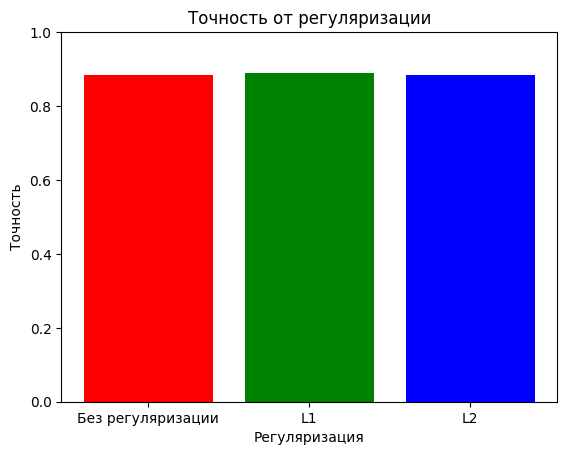

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg_no_reg = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
logreg_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
logreg_no_reg.fit(X_train, y_train)
logreg_l1.fit(X_train, y_train)
logreg_l2.fit(X_train, y_train)
y_pred_no_reg = logreg_no_reg.predict(X_test)
y_pred_l1 = logreg_l1.predict(X_test)
y_pred_l2 = logreg_l2.predict(X_test)
accuracy_no_reg = accuracy_score(y_test, y_pred_no_reg)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
models = ['Без регуляризации', 'L1', 'L2']
accuracies = [accuracy_no_reg, accuracy_l1, accuracy_l2]
plt.bar(models, accuracies, color=['r', 'g', 'b'])
plt.xlabel('Регуляризация')
plt.ylabel('Точность')
plt.title('Точность от регуляризации')
plt.ylim([0, 1])
plt.show()


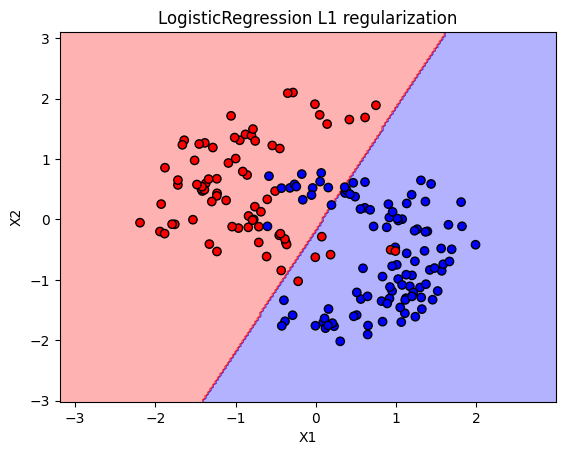

In [70]:
from sklearn.inspection import DecisionBoundaryDisplay
cmap_light = ListedColormap(["blue", "red"])
display_unweighted = DecisionBoundaryDisplay.from_estimator(
    logreg_l1, X_test, response_method='predict',
    xlabel='X1', ylabel='X2',
    grid_resolution=200, alpha = 0.3, cmap = cmap_light)
display_unweighted.ax_.scatter(X_test[:,0], X_test[:,1], c=colors_test, edgecolors = 'black')
plt.title('LogisticRegression L1 regularization')
plt.show()

In [52]:
# Рассчет матрицы ошибок
confusion_logreg_l1 = confusion_matrix(y_test, y_pred_l1)

# Преобразование матрицы ошибок в DataFrame pandas
confusion_df_logreg_l1 = pd.DataFrame(confusion_logreg_l1, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Вывод таблицы ошибок
print("Confusion Matrix for LogisticRegression L1 regularization:")
print(confusion_df_logreg_l1)

Confusion Matrix for LogisticRegression L1 regularization:
          Predicted 0  Predicted 1
Actual 0           91           14
Actual 1            6           70


In [53]:
# Рассчет Precision, Recall и F1-score для LogisticRegression L1 regularization
precision_logreg_l1 = precision_score(y_test, y_pred_l1)
recall_logreg_l1 = recall_score(y_test, y_pred_l1)
f1_logreg_l1 = f1_score(y_test, y_pred_l1)

# Вывод результатов
print("Precision, Recall и F1-score для LogisticRegression L1 regularization:")
print("Precision:", precision_logreg_l1)
print("Recall:", recall_logreg_l1)
print("F1-score:", f1_logreg_l1)

Precision, Recall и F1-score для LogisticRegression L1 regularization:
Precision: 0.8333333333333334
Recall: 0.9210526315789473
F1-score: 0.875


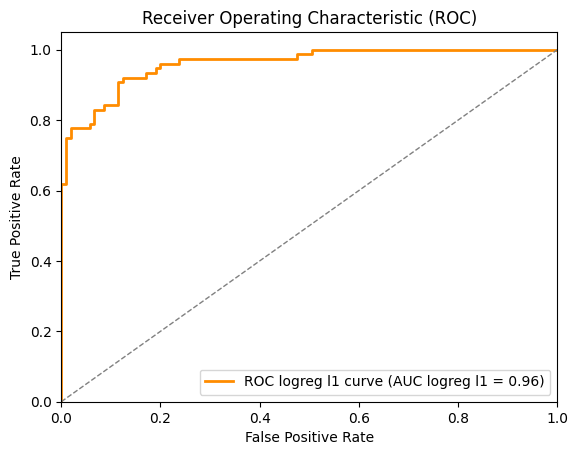

In [54]:
# Получение вероятности принадлежности к классу 1 для LogisticRegression L1 regularization
y_prob_l1 = logreg_l1.predict_proba(X_test)[:, 1]

# Рассчет ROC-кривой и значения AUC LogisticRegression L1 regularization
fpr_logreg_l1, tpr_logreg_l1, _ = roc_curve(y_test, y_prob_l1)
auc_logreg_l1 = auc(fpr_logreg_l1, tpr_logreg_l1)

# Построение ROC-кривой
plt.figure()
plt.plot(fpr_logreg_l1, tpr_logreg_l1, color='darkorange', lw=2, label=f'ROC logreg l1 curve (AUC logreg l1 = {auc_logreg_l1:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Метод опорных векторов

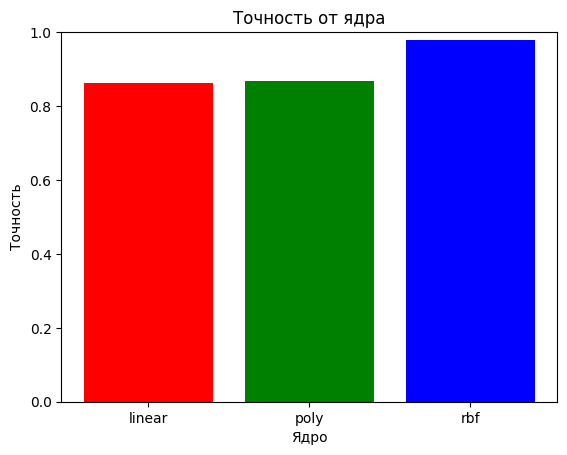

In [89]:
from sklearn.svm import SVC

# Создание моделей с различными типами ядер
svm_linear = SVC(kernel='linear', probability=True)
svm_poly = SVC(kernel='poly', degree=3, probability=True)
svm_rbf = SVC(kernel='rbf', probability=True)

# Обучение моделей
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Расчет точности для каждой модели
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# Построение столбчатой диаграммы
kernels = ['linear', 'poly', 'rbf']
accuracies = [accuracy_linear, accuracy_poly, accuracy_rbf]

plt.bar(kernels, accuracies, color=['r', 'g', 'b'])
plt.xlabel('Ядро')
plt.ylabel('Точность')
plt.title('Точность от ядра')
plt.ylim([0, 1])
plt.show()

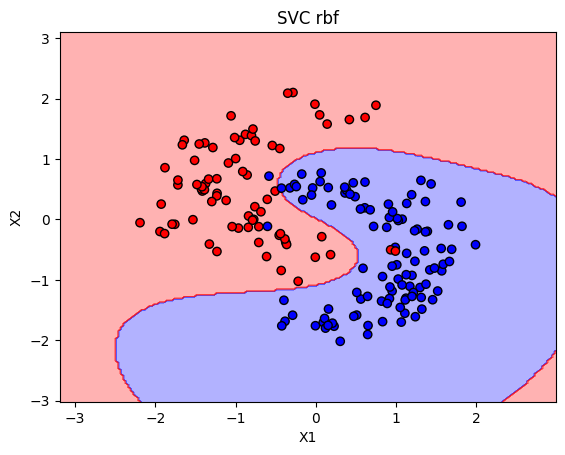

In [91]:
from sklearn.inspection import DecisionBoundaryDisplay
cmap_light = ListedColormap(["blue", "red"])
display_svm_rbf = DecisionBoundaryDisplay.from_estimator(
    svm_rbf, X_test, response_method='predict',
    xlabel='X1', ylabel='X2',
    grid_resolution=200, alpha = 0.3,  cmap = cmap_light)
display_svm_rbf.ax_.scatter(X_test[:,0], X_test[:,1], c=colors_test, edgecolors = 'k')
plt.title('SVC rbf')
plt.show()

In [57]:
# Рассчет матрицы ошибок
confusion_svm_rbf = confusion_matrix(y_test, y_pred_rbf)

# Преобразование матрицы ошибок в DataFrame pandas
confusion_df_svm_rbf = pd.DataFrame(confusion_svm_rbf, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Вывод таблицы ошибок
print("Confusion Matrix for SVC rbf:")
print(confusion_df_svm_rbf)

Confusion Matrix for SVC rbf:
          Predicted 0  Predicted 1
Actual 0          103            2
Actual 1            2           74


In [58]:
# Рассчет Precision, Recall и F1-score для SVM rbf
precision_svm_rbf = precision_score(y_test, y_pred_rbf)
recall_svm_rbf = recall_score(y_test, y_pred_rbf)
f1_svm_rbf = f1_score(y_test, y_pred_rbf)

# Вывод результатов
print("Precision, Recall и F1-score для SVC rbf:")
print("Precision:", precision_svm_rbf)
print("Recall:", recall_svm_rbf)
print("F1-score:", f1_svm_rbf)

Precision, Recall и F1-score для SVC rbf:
Precision: 0.9736842105263158
Recall: 0.9736842105263158
F1-score: 0.9736842105263158


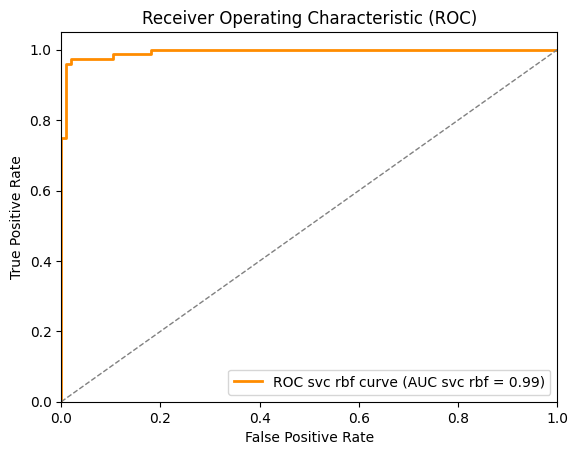

In [59]:
# Получение вероятности принадлежности к классу 1 для SVM rbf
y_prob_rbf = svm_rbf.predict_proba(X_test)[:, 1]

# Рассчет ROC-кривой и значения SVM rbf
fpr_svm_rbf, tpr_svm_rbf, _ = roc_curve(y_test, y_prob_rbf)
auc_svm_rbf = auc(fpr_svm_rbf, tpr_svm_rbf)

# Построение ROC-кривой
plt.figure()
plt.plot(fpr_svm_rbf, tpr_svm_rbf, color='darkorange', lw=2, label=f'ROC svc rbf curve (AUC svc rbf = {auc_svm_rbf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Решающие деревья

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Определение параметров для перебора
param_grid = {
    'max_depth': [3, 5, 7, None],
    'max_leaf_nodes': [None, 5, 10, 20],
    'criterion': ['gini', 'entropy'],
    "min_samples_split": [2, 3, 4, 5]
}

# Создание экземпляра модели решающего дерева
dt = DecisionTreeClassifier()

# Поиск оптимальных параметров с помощью кросс-валидации
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Получение лучших параметров и оценка модели
best_params = grid_search.best_params_
best_dt = grid_search.best_estimator_

# Предсказание на тестовой выборке
y_pred_dt = best_dt.predict(X_test)

# Расчет точности
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)
print("Best parameters:", best_params)

Accuracy: 0.9447513812154696
Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_leaf_nodes': None, 'min_samples_split': 2}


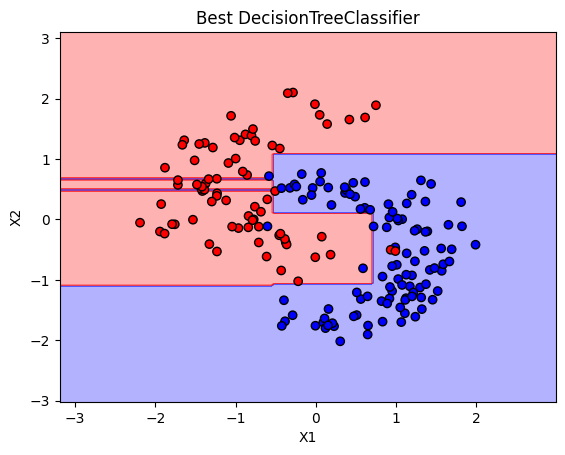

In [93]:
from sklearn.inspection import DecisionBoundaryDisplay
cmap_light = ListedColormap(["blue", "red"])
display_dt = DecisionBoundaryDisplay.from_estimator(
    best_dt, X_test, response_method='predict',
    xlabel='X1', ylabel='X2',
    grid_resolution=200, alpha = 0.3,  cmap = cmap_light)
display_dt.ax_.scatter(X_test[:,0], X_test[:,1], c=colors_test, edgecolors = 'black')
plt.title('Best DecisionTreeClassifier')
plt.show()

In [62]:
# Рассчет матрицы ошибок
confusion_dt = confusion_matrix(y_test, y_pred_dt)

# Преобразование матрицы ошибок в DataFrame pandas
confusion_dt = pd.DataFrame(confusion_dt, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Вывод таблицы ошибок
print("Confusion Matrix for Best DecisionTreeClassifier:")
print(confusion_dt)

Confusion Matrix for Best DecisionTreeClassifier:
          Predicted 0  Predicted 1
Actual 0           99            6
Actual 1            4           72


In [63]:
# Рассчет Precision, Recall и F1-score для Best DecisionTreeClassifier
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Вывод результатов
print("Precision, Recall и F1-score для Best DecisionTreeClassifier:")
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)

Precision, Recall и F1-score для Best DecisionTreeClassifier:
Precision: 0.9230769230769231
Recall: 0.9473684210526315
F1-score: 0.935064935064935


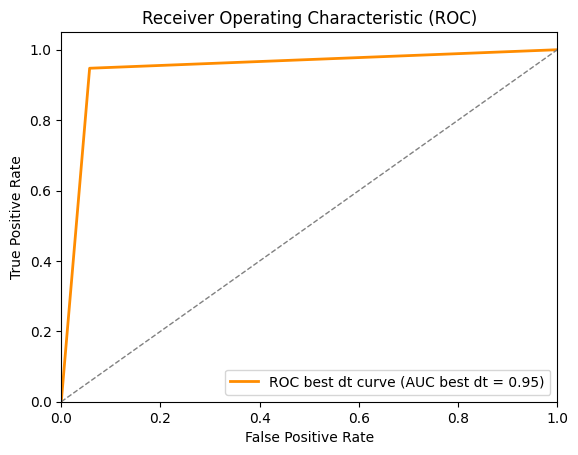

In [64]:
# Получение вероятности принадлежности к классу 1 для Best DecisionTreeClassifier
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]

# Рассчет ROC-кривой и значения Best DecisionTreeClassifier
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = auc(fpr_dt, tpr_dt)

# Построение ROC-кривой
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC best dt curve (AUC best dt = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

[Text(0.4666666666666667, 0.9375, 'x[0] <= -0.521\nentropy = 0.996\nsamples = 420\nvalue = [195, 225]'),
 Text(0.2, 0.8125, 'x[1] <= -1.096\nentropy = 0.146\nsamples = 144\nvalue = [3, 141]'),
 Text(0.13333333333333333, 0.6875, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.26666666666666666, 0.6875, 'x[1] <= 0.677\nentropy = 0.106\nsamples = 143\nvalue = [2, 141]'),
 Text(0.2, 0.5625, 'x[1] <= 0.668\nentropy = 0.177\nsamples = 75\nvalue = [2, 73]'),
 Text(0.13333333333333333, 0.4375, 'x[1] <= 0.474\nentropy = 0.103\nsamples = 74\nvalue = [1, 73]'),
 Text(0.06666666666666667, 0.3125, 'entropy = 0.0\nsamples = 62\nvalue = [0, 62]'),
 Text(0.2, 0.3125, 'x[1] <= 0.489\nentropy = 0.414\nsamples = 12\nvalue = [1, 11]'),
 Text(0.13333333333333333, 0.1875, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.26666666666666666, 0.1875, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.26666666666666666, 0.4375, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.33333333333

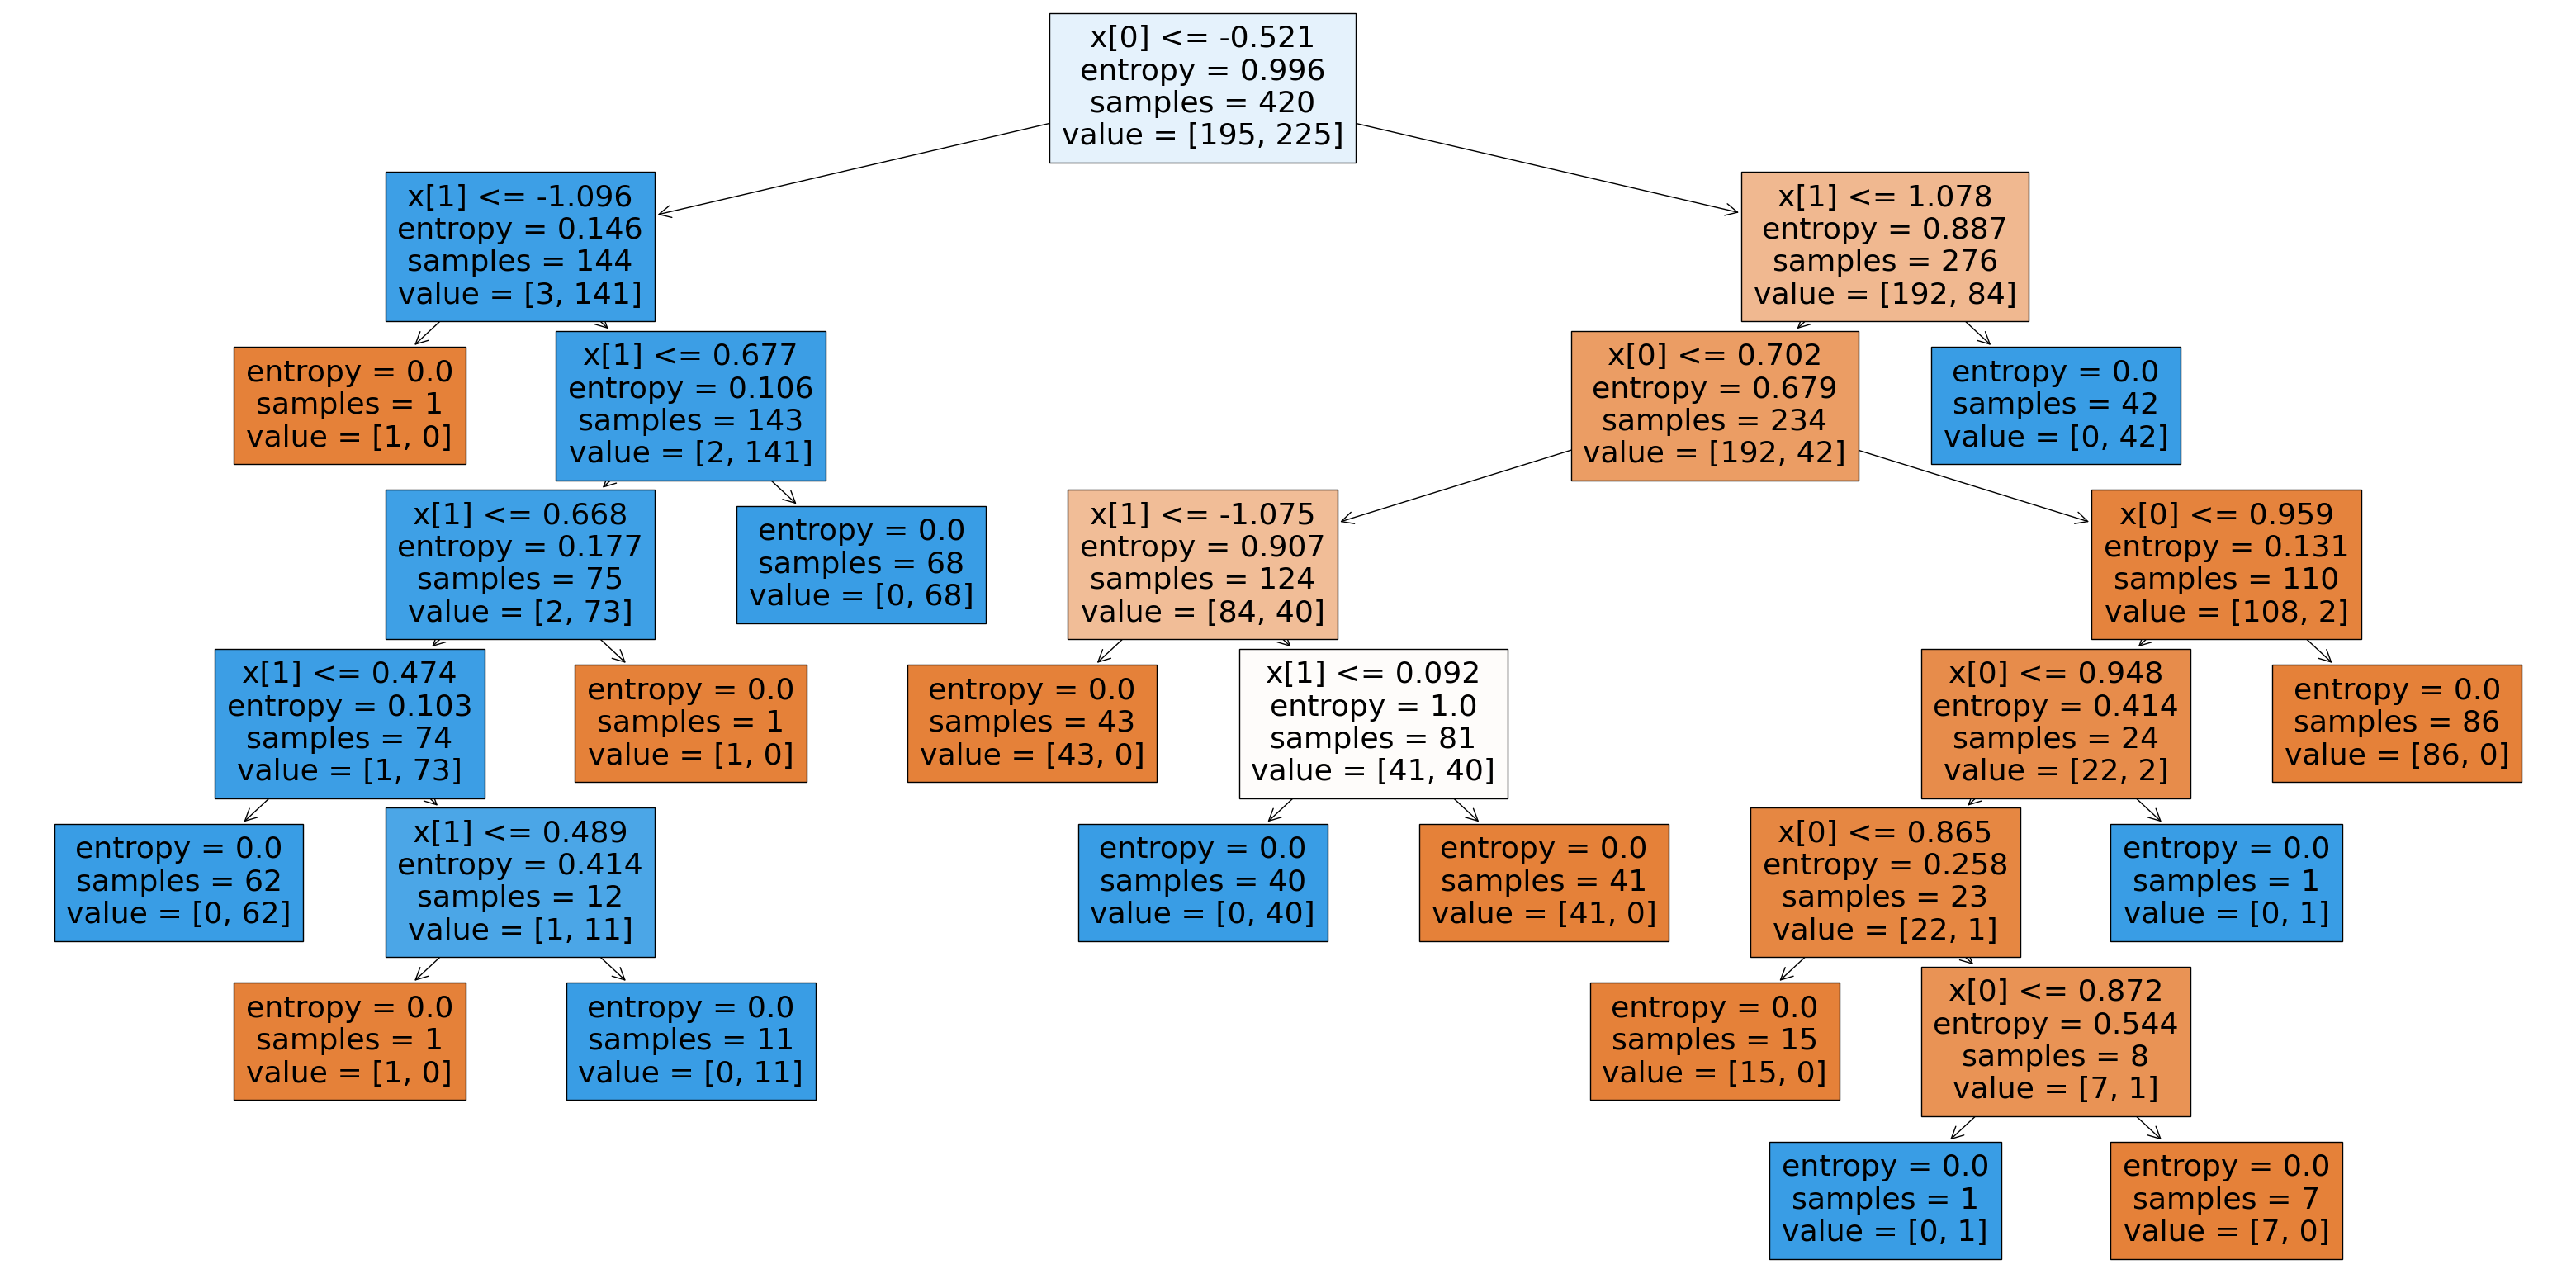

In [95]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(1, 1, figsize=(40, 20))

plot_tree(best_dt, filled = True, ax=ax)

# Выбор классификатора

In [66]:
import pandas as pd

# Создание индексов с названиями классификаторов
classifiers = ['kNN unweighted', 'kNN weighted', 'Logistic Regression L1 regulariozation', 'Support Vector Classifier rbf', 'Decision Trees']

# Создание словаря с метриками для каждого классификатора
metrics = {
    'Precision': [precision_unweighted, precision_weighted, precision_logreg_l1, precision_svm_rbf, precision_dt],
    'Recall': [recall_unweighted, recall_weighted, recall_logreg_l1, recall_svm_rbf, recall_dt],
    'AUC': [auc_unweighted, auc_weighted, auc_logreg_l1, auc_svm_rbf, auc_dt]
}

# Создание DataFrame из словаря
metrics_df = pd.DataFrame(data=metrics, index=classifiers)

# Вывод таблицы
metrics_df

,Precision,Recall,AUC
kNN unweighted,0.973684,0.973684,0.977318
kNN weighted,0.973684,0.973684,0.977318
Logistic Regression L1 regulariozation,0.833333,0.921053,0.961153
Support Vector Classifier rbf,0.973684,0.973684,0.993985
Decision Trees,0.923077,0.947368,0.945113
